In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/DSW/train_data.xlsx")

# Display basic information
print(data.info())

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [4]:
# Load data and get basic information
print(data.info())
print(data.describe())

# Check for null values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Unique value counts for categorical columns
categorical_columns = ['sub_grade', 'home_ownership', 'purpose', 'verification_status', 'application_type']
for col in categorical_columns:
    print(f"{col} unique values: {data[col].value_counts()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

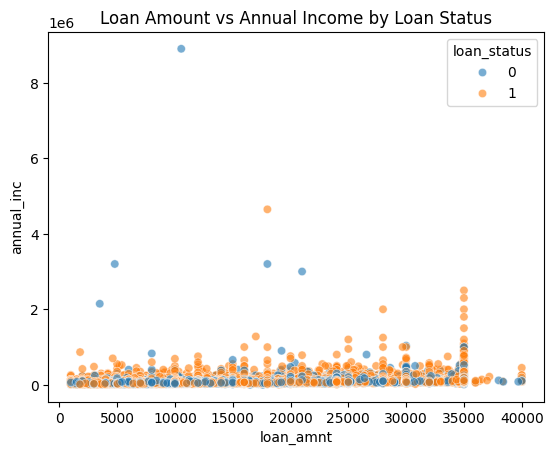

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='loan_amnt', y='annual_inc', hue='loan_status', data=data, alpha=0.6)
plt.title("Loan Amount vs Annual Income by Loan Status")
plt.show()



As per above output defaulters are more common with low incomes and high loan amounts and there are some outliers

In [9]:
sns.histplot(data=data, x='cibil_score', hue='loan_status', kde=True, bins=20)
plt.title("Cibil Score Distribution by Loan Status")
plt.show()


As per above output defaulters have lower CIBIL scores, while non-defaulters tend to have higher scores.

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loan Amount vs Annual Income
sns.scatterplot(ax=axes[0], x='loan_amnt', y='annual_inc', hue='loan_status', data=data, alpha=0.6)
axes[0].set_title("Loan Amount vs Annual Income")

# Cibil Score vs Employment Length
sns.scatterplot(ax=axes[1], x='cibil_score', y='emp_length', hue='loan_status', data=data, alpha=0.6)
axes[1].set_title("Cibil Score vs Employment Length")

plt.tight_layout()
plt.show()


As per the above output :
1. Loan Amount vs Annual Income: Loan defaults occur across all income levels, showing no strong correlation between annual income and loan repayment.
2. Cibil Score vs Employment Length: Higher Cibil scores and longer employment lengths slightly indicate better repayment, but overlap exists between loan statuses.

In [11]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title("Loan Amount by Loan Status")
plt.show()


As per the above output loan amounts are similar for both loan statuses, with slightly higher variability and outliers for defaults (loan_status = 0).
The median loan amount for defaults and non-defaults is close, indicating loan amount alone may not strongly impact repayment behavior.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


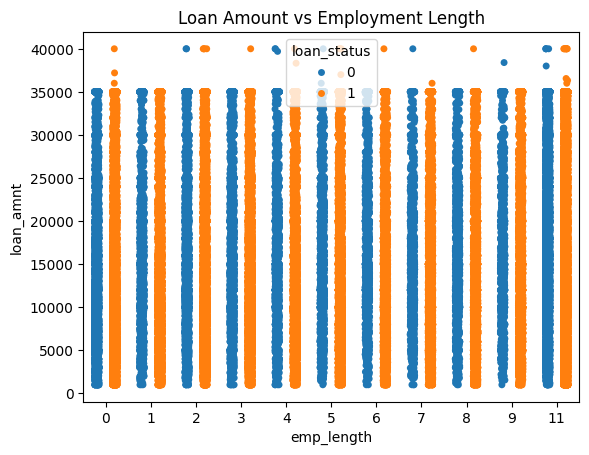

In [12]:
sns.stripplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, jitter=True, dodge=True)
plt.title("Loan Amount vs Employment Length")
plt.show()


Loan amounts are distributed evenly across all employment lengths, with no significant difference between defaults (loan_status = 0) and repayments (loan_status = 1), suggesting employment length alone does not strongly impact loan repayment.

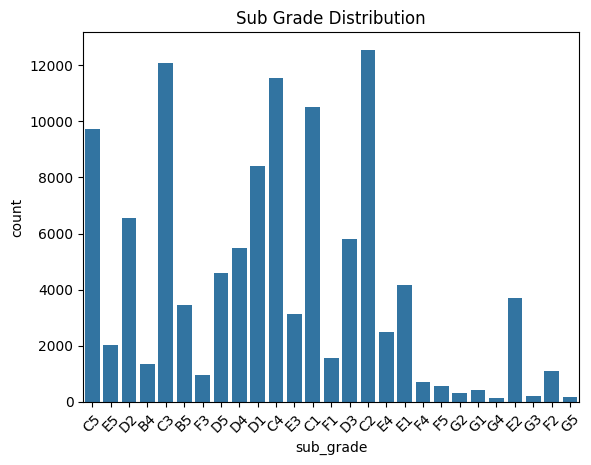

In [14]:
sns.countplot(x='sub_grade', data=data)
plt.title('Sub Grade Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for clarity
plt.show()


The distribution of sub-grades is uneven, with grades like B4, C1, and D4 having significantly higher counts compared to others. This suggests a concentration of records in specific sub-grade categories within the dataset.

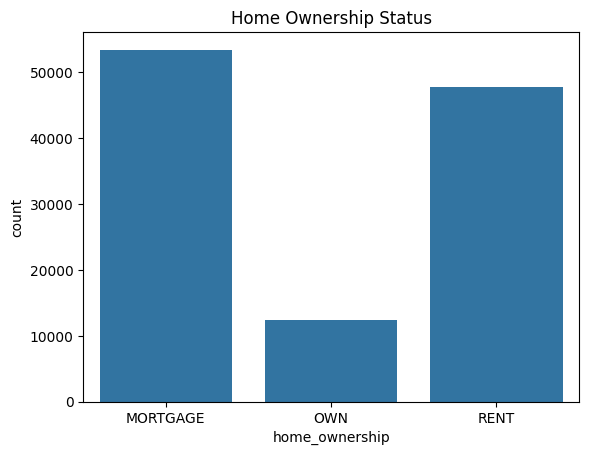

In [15]:
sns.countplot(x='home_ownership', data=data)
plt.title('Home Ownership Status')
plt.show()


The majority of the dataset comprises individuals who own their homes, followed by those who are renting or have other ownership statuses. This indicates that home ownership is predominantly stable within the dataset, with fewer records in alternative categories.

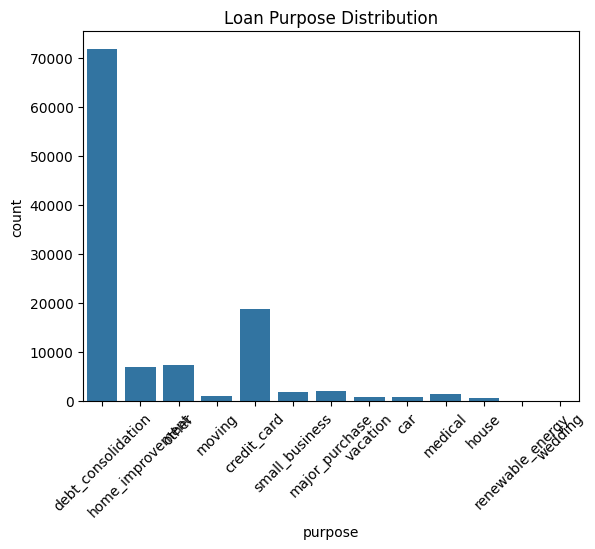

In [16]:
sns.countplot(x='purpose', data=data)
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


The most common loan purpose in the dataset is debt consolidation, followed by credit card usage. Other purposes, like home improvement and small business, occur much less frequently.

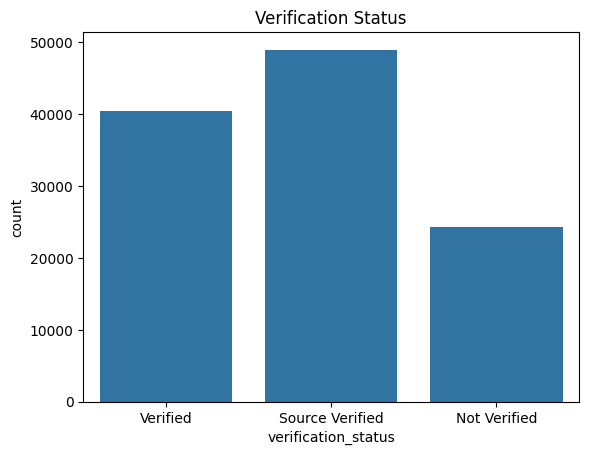

In [17]:
sns.countplot(x='verification_status', data=data)
plt.title('Verification Status')
plt.show()


The bar chart shows that the majority of entries in the dataset are either "Verified" or "Source Verified," while a smaller proportion is "Not Verified." This indicates that most data points in the dataset have some level of verification.

In [19]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix highlights the relationships between numeric variables. For instance, "loan_amt" and "installment" are highly correlated (correlation ≈ 0.94), indicating a strong linear relationship. Conversely, most other variables show weak or negligible correlations with "loan_status," suggesting limited direct influence on it.

In [20]:
sns.scatterplot(x='cibil_score', y='annual_inc', hue='loan_status', data=data, alpha=0.6)
plt.title("Cibil Score vs Annual Income by Loan Status")
plt.show()


The scatter plot shows that as the CIBIL score increases, the annual income values are generally more concentrated at lower levels. There is no strong visual separation of loan status (0 or 1), suggesting that neither CIBIL score nor annual income alone clearly determines loan approval.

In [21]:
data['transaction_month'] = pd.to_datetime(data['transaction_date']).dt.to_period('M')
monthly_trend = data.groupby('transaction_month')['loan_amnt'].sum()

monthly_trend.plot(kind='line', figsize=(10, 6))
plt.title("Monthly Loan Amount Trend")
plt.ylabel("Total Loan Amount")
plt.xlabel("Month")
plt.grid(True)
plt.show()


This graph shows fluctuations in the total loan amount over time, with periodic peaks and troughs suggesting variability in lending activity. It indicates seasonality or irregular patterns in loan disbursements, possibly influenced by external factors or borrower behavior.

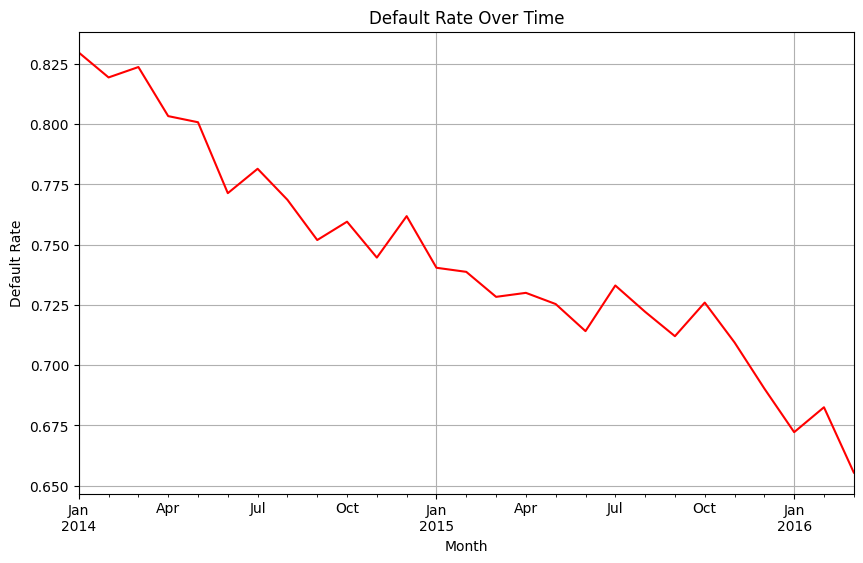

In [22]:
monthly_default_rate = data.groupby('transaction_month')['loan_status'].mean()
monthly_default_rate.plot(kind='line', figsize=(10, 6), color='red')
plt.title("Default Rate Over Time")
plt.ylabel("Default Rate")
plt.xlabel("Month")
plt.grid(True)
plt.show()


The graph demonstrates a downward trend in the default rate over time, suggesting an improvement in loan repayment behavior or creditworthiness of borrowers. This could reflect better lending practices, economic conditions, or borrower management.

In [23]:
data['debt_to_income'] = data['loan_amnt'] / data['annual_inc']

sns.boxplot(x='loan_status', y='debt_to_income', data=data)
plt.title("Debt-to-Income Ratio by Loan Status")
plt.show()


The boxplot indicates that the debt-to-income ratio distribution is similar for both loan statuses (0 and 1), with a few outliers. This suggests that the debt-to-income ratio may not be a strong distinguishing factor for loan defaults in this dataset.

In [24]:
data['account_balance_bucket'] = pd.qcut(data['account_bal'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

sns.countplot(x='account_balance_bucket', hue='loan_status', data=data)
plt.title("Account Balance Buckets and Loan Status")
plt.show()


From the plot, we observe that individuals in all account balance buckets (Low, Medium, High, Very High) are predominantly in the `loan_status = 1` category. This indicates that the majority of borrowers across all account balance levels have loans approved or active.